# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

this data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. and you can read more about it [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

### Questions
- What are the top 10 most popular movies in all times?
- What are the top 10 most profitable movies in all times?
- Which genres are most popular from year to year?
- What is the most popular genre in all time?
- How is popularity trending over time?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Setting up the general theme of charts and color palette to use
sns.set_theme(style='white', palette='Set2')
base_color = '#00334e'
title_font = {'fontsize': 20, 'fontweight':'bold'}
axis_font = {'fontsize': 14}

# To display charts in the same notebook
%matplotlib inline

# Pandas diplay options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines.
tmdb = pd.read_csv('data/tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Display the dataset information
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Display the number of missing values for each column or feature
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# Display summary statistics for the numeric features of the data
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Display Movies with runtime more than 3 hours
print(f'There is {tmdb[tmdb.runtime > 180].shape[0]} movies longer than 3 hours')
tmdb[tmdb.runtime > 180]

There is 128 movies longer than 3 hours


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
415,340968,tt2492296,0.249595,0,0,Show Me a Hero,Oscar Isaac|Alfred Molina|Winona Ryder|Catheri...,NaN,Paul Haggis,How does a politician know he's doing the righ...,mayor|politics|murder|tv mini-series|racism,Mayor Nick Wasicsko took office in 1987 during...,300,History|Crime|Drama,NaN,8/16/15,32,7.7,2015,0.000000e+00,0.000000e+00
559,373977,tt4146128,0.031635,0,0,Childhood's End,Mike Vogel|Osy Ikhile|Daisy Betts|Georgina Hai...,NaN,Nick Hurran,NaN,NaN,"After peaceful aliens invade earth, humanity f...",246,Thriller|TV Movie|Science Fiction|Drama,NaN,12/14/15,21,6.2,2015,0.000000e+00,0.000000e+00
609,321640,tt4299972,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,NaN,Andrew Jarecki,Four Decades. Three Murders. And One Very Rich...,murder|crime|real life,"Robert Durst, scion of one of New Yorkâ€™s bil...",240,Documentary,Blumhouse Productions|Hit the Ground Running F...,2/8/15,72,8.4,2015,0.000000e+00,0.000000e+00
989,289314,tt3012698,0.369555,0,0,Olive Kitteridge,Frances McDormand|Richard Jenkins|Bill Murray|...,NaN,Lisa Cholodenko,There's no such thing as a simple life.,woman director,The story focuses on a middle-school math teac...,233,Drama,Home Box Office (HBO)|Playtone Productions|As ...,11/2/14,41,7.1,2014,0.000000e+00,0.000000e+00
1077,289394,tt3132738,0.342044,0,0,Houdini,Adrien Brody|Kristen Connolly|Evan Jones|Tom B...,NaN,Uli Edel,NaN,magic|biography|houdini,Follow the man behind the magic as he finds fa...,210,TV Movie|Drama|History,A&E Television Networks|Lionsgate Television,9/1/14,53,7.1,2014,0.000000e+00,0.000000e+00
1183,312497,tt3696720,0.028695,0,0,Ascension,Tricia Helfer|Gil Bellows|Brian Van Holt|Andre...,NaN,Mairzee Almas|Nick Copus|Robert Lieberman,Be part of mankind's last hope.,woman director,"In this three-part miniseries, a young woman's...",282,Drama|Science Fiction|TV Movie,NaN,12/15/14,30,5.5,2014,0.000000e+00,0.000000e+00
1235,242754,tt2761630,0.093377,0,0,Klondike,Richard Madden|Abbie Cornish|Sam Shepard|Tim R...,http://www.klondiketv.com,Simon Cellan Jones,Stake your claim.,gold rush|tv mini-series,The story centers on the friendship of two adv...,285,Drama|History,Scott Free Productions|Discovery Channel|E1 En...,1/20/14,17,6.7,2014,0.000000e+00,0.000000e+00
1678,61872,tt1461312,0.342084,0,0,Alice,Caterina Scorsone|Kathy Bates|Andrew-Lee Potts...,NaN,Nick Willing,Welcome to a whole new Wonderland.,NaN,The story takes place in Wonderland 150 years ...,240,Fantasy|Drama|Science Fiction,NaN,12/6/09,32,6.0,2009,0.000000e+00,0.000000e+00
1802,183894,tt1366312,0.189207,0,0,Emma,Romola Garai|Michael Gambon|Jonny Lee Miller|L...,NaN,Jim O'Hanlon,NaN,NaN,"Emma Woodhouse seems to be perfectly content, ...",240,Romance|Comedy|Drama,NaN,10/11/09,17,7.6,2009,0.000000e+00,0.000000e+00
1865,220903,tt1533395,0.102223,0,0,Life,David Attenborough|Oprah Winfrey,http://www.bbc.co.uk/programmes/b00lbpcy,Martha Holmes|Simon Blakeney|Stephen Lyle,From the Makers of Planet Earth,plants|animal species|biology|wildlife|ecology,David Attenborough's legendary BBC crew explai...,500,Documentary,British Broadcasting Corporation (BBC),12/14/09,24,7.0,2009,0.000000e+00,0.000000e+00


In [7]:
# Display Movies with runtime less than 1 hour
print(f'There is {tmdb[tmdb.runtime < 60].shape[0]} movies shorter than 1 hour')
tmdb[tmdb.runtime < 60]

There is 318 movies shorter than 1 hour


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.000000e+00
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,sister sister relationship|birthday|song|birth...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.000000e+00
159,251516,tt3472226,0.953046,630019,0,Kung Fury,David Sandberg|Jorma Taccone|Leopold Nilsson|A...,http://www.kungfury.com/,David Sandberg,It takes a cop from the future to fight an ene...,video game|martial arts|kung fu|hacker|nazis,"During an unfortunate series of events, a frie...",31,Action|Comedy|Science Fiction|Fantasy,Laser Unicorns,5/28/15,487,7.7,2015,5.796172e+05,0.000000e+00
181,322456,tt4189260,0.821443,0,0,LEGO DC Comics Super Heroes: Justice League vs...,Nolan North|Troy Baker|Diedrich Bader|Khary Pa...,http://www.lego.com/en-us/dccomicssuperheroes,Brandon Vietti,There are two sides to every hero,dc comics|based on comic book|super powers|lego,"Supermanâ€™s clone, Bizarro, has become an emb...",48,Action|Adventure|Animation|Family,Warner Bros. Animation,2/10/15,14,6.4,2015,0.000000e+00,0.000000e+00
216,286192,tt3824386,0.640151,0,0,Lava,Napua Greig|Kuana Torres Kahele,http://www.pixar.com/short_films/Theatrical-Sh...,James Ford Murphy,NaN,pixar animated short|animation|pixar|short,The story follows the love story of two volcan...,7,Animation|Comedy|Family|Fantasy|Music,Pixar Animation Studios,6/19/15,298,7.3,2015,0.000000e+00,0.000000e+00
279,355338,tt4941804,0.442835,0,0,Riley's First Date?,Amy Poehler|Phyllis Smith|Bill Hader|Lewis Bla...,NaN,Josh Cooley,NaN,mother daughter relationship|rock music|girl|f...,"Riley, now 12, is hanging out at home with her...",5,Animation|Family,Walt Disney Pictures|Pixar Animation Studios,11/3/15,137,7.3,2015,0.000000e+00,0.000000e+00
284,364067,tt4537842,0.439598,0,0,A Very Murray Christmas,Bill Murray|Paul Shaffer|George Clooney|Miley ...,http://www.netflix.com/title/80042368,Sofia Coppola,NaN,woman director|christmas,Bill Murray worries no one will show up to his...,56,Comedy|Music,American Zoetrope|South Beach Productions|Depa...,12/4/15,101,5.4,2015,0.000000e+00,0.000000e+00
305,359983,tt4938602,0.250209,0,0,The Lion Guard: Return of the Roar,Max Charles|Jeff Bennett|Dusan Brown|Sarah Hyl...,NaN,Howy Parkins,NaN,NaN,"Set in the African savannah, the film follows ...",44,Family|TV Movie|Animation,Walt Disney Television Animation,11/22/15,48,5.9,2015,0.000000e+00,0.000000e+00
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.000000e+00
343,366142,tt5223342,0.344994,0,0,Minions: The Competition,Pierre Coffin|Chris Renaud,NaN,Kyle Balda|Julien Soret,NaN,minions,Two minions working in a bomb lab get competit...,4,Animation,Illumination Entertainment,11/4/15,16,5.9,2015,0.000000e+00,0.000000e+00


In [8]:
# Display number of movies with budget 0 USD
print(f'There is {tmdb[tmdb.budget_adj == 0].shape[0]} with budget 0 USD')

There is 5696 with budget 0 USD


In [9]:
# Display number of movies with revenue 0 USD
print(f'There is {tmdb[tmdb.revenue_adj == 0].shape[0]} with revenu 0 USD')

There is 6016 with revenu 0 USD


In [10]:
# Display the number of unique cast
tmdb.cast.nunique()

10719

In [11]:
# Display any duplicated rows
tmdb[tmdb.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
# Display the unique genres in the dataset
tmdb.genres.dropna().str.split('|').apply(lambda x: pd.value_counts(x)).fillna(0).columns

Index(['Thriller', 'Science Fiction', 'Adventure', 'Action', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Comedy', 'Animation', 'Mystery',
       'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary',
       'TV Movie', 'Foreign'],
      dtype='object')

#### Observations

- As we can see in the data there is some very short movies and very long movies I will remove them from the data to compare similar movies together.
- there is some missing values need to be removed.
- there is more than one genre for many movies.
- there is many movies with 0 budget or 0 revenue. 
- one dublicated movie

ِِ
### Data Cleaning 

- I will need the following columns in my investigation (`popularity`, `original_title`, `cast`, `director`, `runtime`, `genres`, `vote_count`, `vote_average`, `release_year`, `budget_adj`, `revenue_adj`) and drop the rest.
- Drop any missing values.
- Drop any duplicated values.
- Remove any movie less than 1 hour long or longer than 3 hours.
- Replace any 0 budget or revenue to np.nan
- Create a new feature `profit_loss` by subtracting the `budget_adj` from `revenue_adj`.
- Create another feature `profit_loss_percentage` by dividing the `profit_loss` by the `budget_adj`
- Create another dataframe to hold the genres and their statistics.

In [13]:
# Listing the columns to keep in our cleaned dataset
keep_cols = ['popularity', 'original_title', 'cast', 'director', 
             'runtime', 'genres', 'vote_count', 'vote_average', 
             'release_year', 'budget_adj', 'revenue_adj']

In [14]:
# Creating a copy of the data to clean and removing any uneeded columns
clean_tmdb = tmdb.copy()[keep_cols]

In [15]:
# Drop any missing values
clean_tmdb.dropna(inplace=True)
clean_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   original_title  10732 non-null  object 
 2   cast            10732 non-null  object 
 3   director        10732 non-null  object 
 4   runtime         10732 non-null  int64  
 5   genres          10732 non-null  object 
 6   vote_count      10732 non-null  int64  
 7   vote_average    10732 non-null  float64
 8   release_year    10732 non-null  int64  
 9   budget_adj      10732 non-null  float64
 10  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1006.1+ KB


In [16]:
# Drop any duplicated values
clean_tmdb.drop_duplicates(inplace=True)
clean_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10731 non-null  float64
 1   original_title  10731 non-null  object 
 2   cast            10731 non-null  object 
 3   director        10731 non-null  object 
 4   runtime         10731 non-null  int64  
 5   genres          10731 non-null  object 
 6   vote_count      10731 non-null  int64  
 7   vote_average    10731 non-null  float64
 8   release_year    10731 non-null  int64  
 9   budget_adj      10731 non-null  float64
 10  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1006.0+ KB


In [17]:
# Removing any movie shorter than an hour or longer than 3 hours
clean_tmdb = clean_tmdb.query('runtime >= 60 & runtime <= 180')
clean_tmdb.runtime.describe()

count    10338.000000
mean       102.728381
std         17.652568
min         60.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        180.000000
Name: runtime, dtype: float64

In [18]:
# Replace 0 budget or 0 revenue with np.nan
clean_tmdb.budget_adj.replace(0, np.nan, inplace=True)
clean_tmdb.revenue_adj.replace(0, np.nan, inplace=True)

In [19]:
# Create new feature profit/loss
clean_tmdb['profit_loss'] = clean_tmdb.revenue_adj - clean_tmdb.budget_adj

In [20]:
# Display the profit_loss summary statistics
clean_tmdb.profit_loss.describe()

count    3.813000e+03
mean     9.175876e+07
std      1.901157e+08
min     -4.139124e+08
25%     -1.505554e+06
50%      2.736550e+07
75%      1.068251e+08
max      2.750137e+09
Name: profit_loss, dtype: float64

In [21]:
# Create profit_loss_percentage feature
clean_tmdb['profit_loss_percentage'] = clean_tmdb.profit_loss / clean_tmdb.budget_adj

# Display it's summary statistics
clean_tmdb.profit_loss_percentage.describe()

count    3.813000e+03
mean     3.002061e+02
std      1.653072e+04
min     -9.999998e-01
25%     -1.206897e-01
50%      1.122909e+00
75%      3.208167e+00
max      1.018618e+06
Name: profit_loss_percentage, dtype: float64

In [22]:
# Display dataset information
clean_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10338 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   popularity              10338 non-null  float64
 1   original_title          10338 non-null  object 
 2   cast                    10338 non-null  object 
 3   director                10338 non-null  object 
 4   runtime                 10338 non-null  int64  
 5   genres                  10338 non-null  object 
 6   vote_count              10338 non-null  int64  
 7   vote_average            10338 non-null  float64
 8   release_year            10338 non-null  int64  
 9   budget_adj              5077 non-null   float64
 10  revenue_adj             4802 non-null   float64
 11  profit_loss             3813 non-null   float64
 12  profit_loss_percentage  3813 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.1+ MB


Here I want to create a new dataframe to hold the genres statistics and I will reach that by the following steps.

In [23]:
# First I will create a copy of the cleaned dataframe
genres = clean_tmdb.copy()

In [24]:
# Convert genres string into list 
genres.genres = genres.genres.str.split('|')

In [25]:
# Explode the genres into sepearated rows
genres = genres.explode('genres')
genres.shape

(25775, 13)

In [26]:
# Convert the dataframe into grouped by year and genres
agg_dict = {'original_title': 'count',
            'popularity': 'mean',
            'runtime': 'mean',
            'vote_count': 'mean', 
            'vote_average': 'mean',
            'budget_adj': 'mean',
            'revenue_adj': 'mean',
            'profit_loss': 'mean',
            'profit_loss_percentage': 'mean'}
genres = genres.groupby(['genres', 'release_year'], as_index=False).agg(agg_dict)

In [27]:
# Rename the original title column to count
genres.rename(columns={'original_title': 'count'}, inplace=True)

In [28]:
# Display the first few rows of the final df
genres.head()

,genres,release_year,count,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit_loss,profit_loss_percentage
0,Action,1960,6,0.555346,115.166667,50.333333,5.900000,1.474593e+07,3.616441e+07,2.141847e+07,1.452500
1,Action,1961,6,0.375595,126.000000,31.500000,6.183333,3.890593e+07,1.210947e+08,7.732553e+07,1.766667
2,Action,1962,8,0.708945,125.375000,100.250000,6.162500,6.271351e+07,3.950230e+08,3.369950e+08,27.757576
3,Action,1963,4,0.951729,136.000000,140.750000,6.450000,6.859106e+07,3.164876e+08,2.470658e+08,15.073871
4,Action,1964,5,0.813087,130.600000,145.600000,6.460000,2.460594e+07,8.780804e+08,8.534745e+08,34.685714


In [29]:
# Display the dataframe information
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genres                  1030 non-null   object 
 1   release_year            1030 non-null   int64  
 2   count                   1030 non-null   int64  
 3   popularity              1030 non-null   float64
 4   runtime                 1030 non-null   float64
 5   vote_count              1030 non-null   float64
 6   vote_average            1030 non-null   float64
 7   budget_adj              899 non-null    float64
 8   revenue_adj             866 non-null    float64
 9   profit_loss             824 non-null    float64
 10  profit_loss_percentage  824 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 96.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis




### What are the top 10 most popular movies in all times?

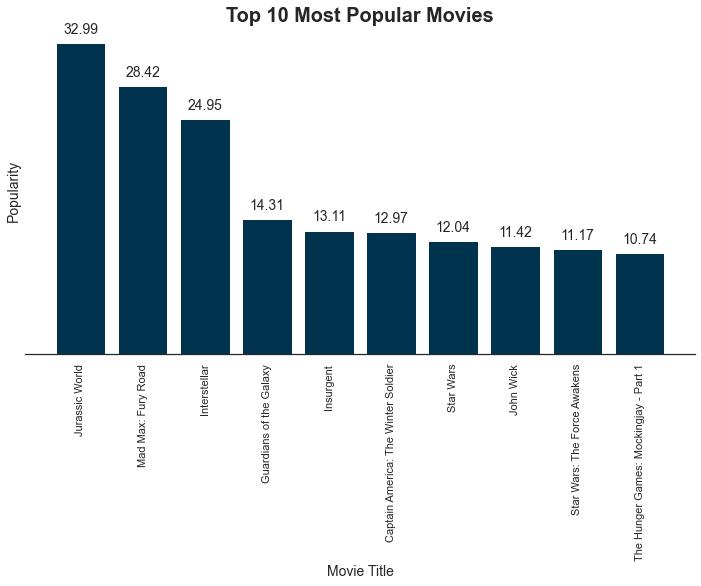

In [30]:
# Creating a subset dataframe for plotting
top_popular = clean_tmdb.sort_values('popularity', ascending=False).head(10)
popularity_str = [f'{p:.2f}' for p in top_popular.popularity.values]
# Ploting
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(data=top_popular, x='original_title', height='popularity', color=base_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for i, c in enumerate(top_popular.popularity.values):
    plt.text(i, c+1, popularity_str[i], ha='center', size=14)
ax.set_xlabel('Movie Title', fontdict=axis_font)
ax.set_ylabel('Popularity', fontdict=axis_font)
ax.set_title('Top 10 Most Popular Movies', fontdict=title_font)
plt.xticks(rotation=90)
plt.yticks([])
plt.show()

- Jurassic wolrd is the most popular movie in all time.

### What are the top 10 most profitable movies in all times?

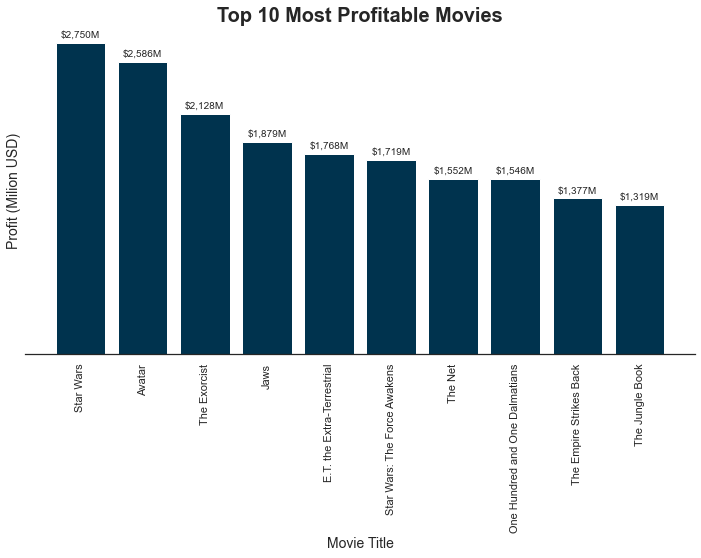

In [31]:
# Creating a subset dataframe for plotting
top_profit = clean_tmdb.sort_values('profit_loss', ascending=False).head(10)
profit_str = [f'${p/1e6:,.0f}M' for p in top_profit.profit_loss.values]
# Ploting
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(data=top_profit, x='original_title', height='profit_loss', color=base_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for i, c in enumerate(top_profit.profit_loss.values):
    plt.text(i, c+5e7, profit_str[i], ha='center', size=10)
ax.set_xlabel('Movie Title', fontdict=axis_font)
ax.set_ylabel('Profit (Milion USD)', fontdict=axis_font)
ax.set_title('Top 10 Most Profitable Movies', fontdict=title_font)
plt.xticks(rotation=90)
plt.yticks([])
plt.show()

- Star Wars the most profitable movie with 2.75 pilion USD.

### Which genres are most popular from year to year?
As we can see Animation movies was so popular in 1960 to 2000 after that the comedy started to rise and now in 2015 it's the most popular genre.

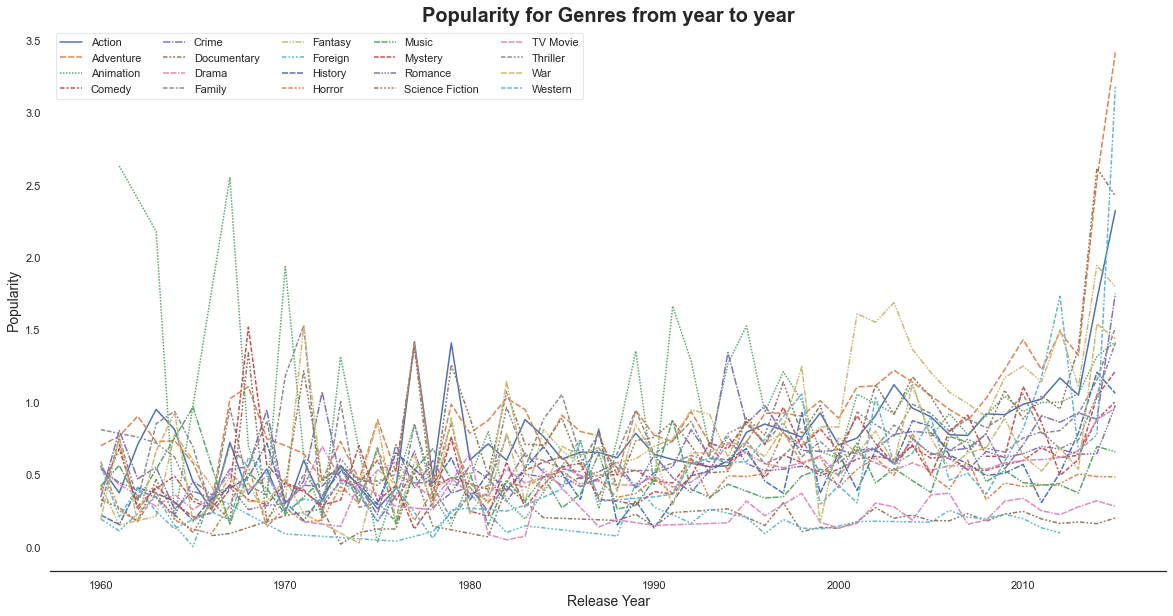

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=genres, x='release_year', y='popularity', hue='genres', style='genres', ax=ax, palette='deep')
sns.despine(left=True)
plt.legend(ncol=5, loc=2, framealpha=0.5)
plt.xlabel('Release Year', fontdict=axis_font)
plt.ylabel('Popularity', fontdict=axis_font)
plt.title('Popularity for Genres from year to year', fontdict=title_font)
plt.show()

- The popularity of genres vary from year to year.

### What is the most popular genre in all time?

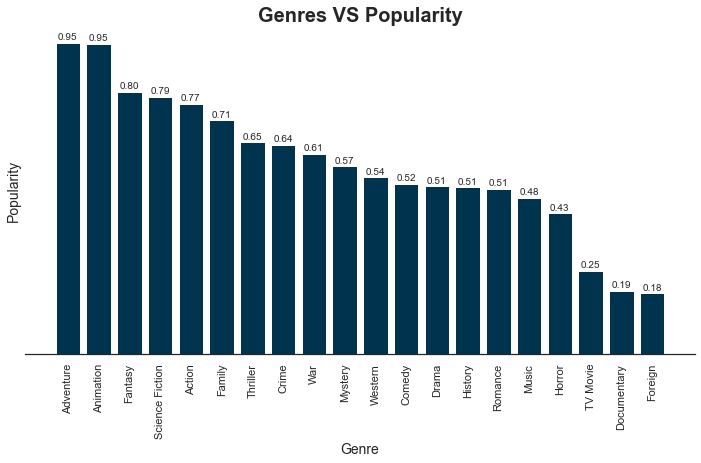

In [33]:
# Creating a subset dataframe for plotting
genre_bar = genres[['genres', 'popularity']].groupby('genres', as_index=False).mean().sort_values('popularity', ascending=False)

genre_str = [f'{p:,.2f}' for p in genre_bar.popularity.values]
# Ploting
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(data=genre_bar, x='genres', height='popularity', color=base_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for i, c in enumerate(genre_bar.popularity.values):
    plt.text(i, c+0.01, genre_str[i], ha='center', size=10)
ax.set_xlabel('Genre', fontdict=axis_font)
ax.set_ylabel('Popularity', fontdict=axis_font)
ax.set_title('Genres VS Popularity', fontdict=title_font)
plt.xticks(rotation=90)
plt.yticks([])
plt.show()

- The adventure and animation genres shares the highest average popularity.

## How is popularity trending over time?

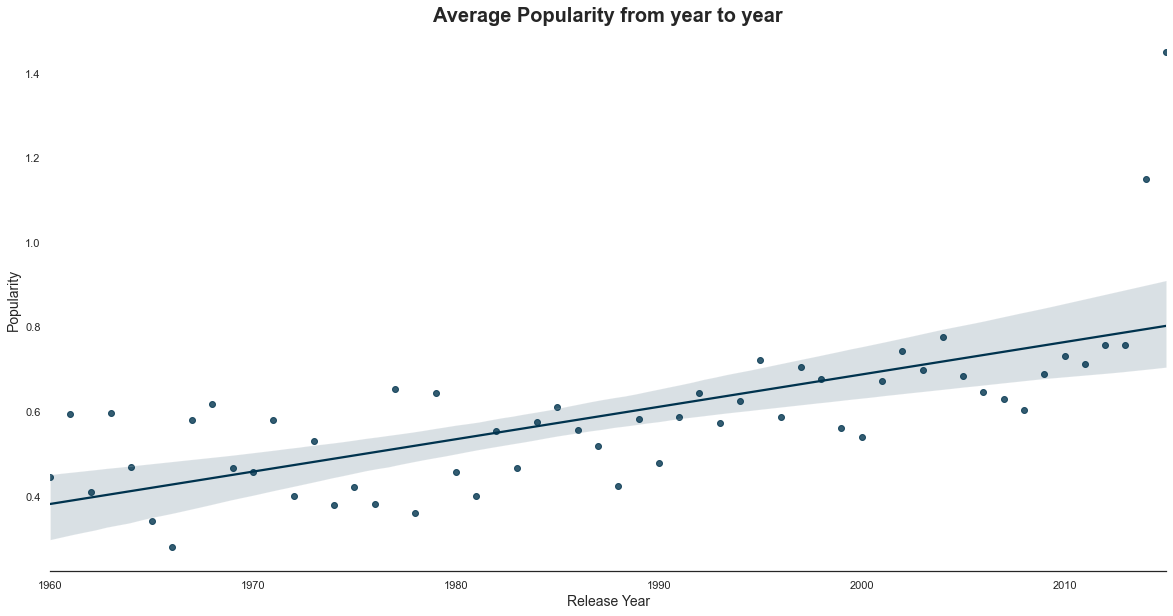

In [34]:
# Creating a subset data for plotting
genres_scatter = genres[['release_year', 'popularity']].groupby('release_year', as_index=False).mean()

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(data=genres_scatter, x='release_year', y='popularity', color=base_color, ax=ax)
sns.despine(left=True)
plt.xlabel('Release Year', fontdict=axis_font)
plt.ylabel('Popularity', fontdict=axis_font)
plt.title('Average Popularity from year to year', fontdict=title_font)
plt.show()

- As we can see the popularity of movies is increasing from year to year.

<a id='conclusions'></a>
## Conclusions
- The adventure and animation genres shares the highest average popularity.
- The popularity of genres vary from year to year.
- Star Wars the most profitable movie with 2.75 pilion USD.
- Jurassic wolrd is the most popular movie in all time.
- the popularity of movies is increasing from year to year.

#### Limitations of the data
- there is more than one genre for many movies.
- there is many movies with 0 budget or 0 revenue. 
